# Face Recognition Using Improved Deep Learning Neural Network 

IMPORT LIBRARIES

In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mplib

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, EarlyStopping
from tensorflow.keras import backend as K
from scipy.linalg import eigh
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from time import time

LOAD DATA

In [2]:
faces = pd.read_csv('./face_data.csv')
faces.shape

(400, 4097)

VIEW DATA

In [3]:
faces.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


VIEW SEABORN

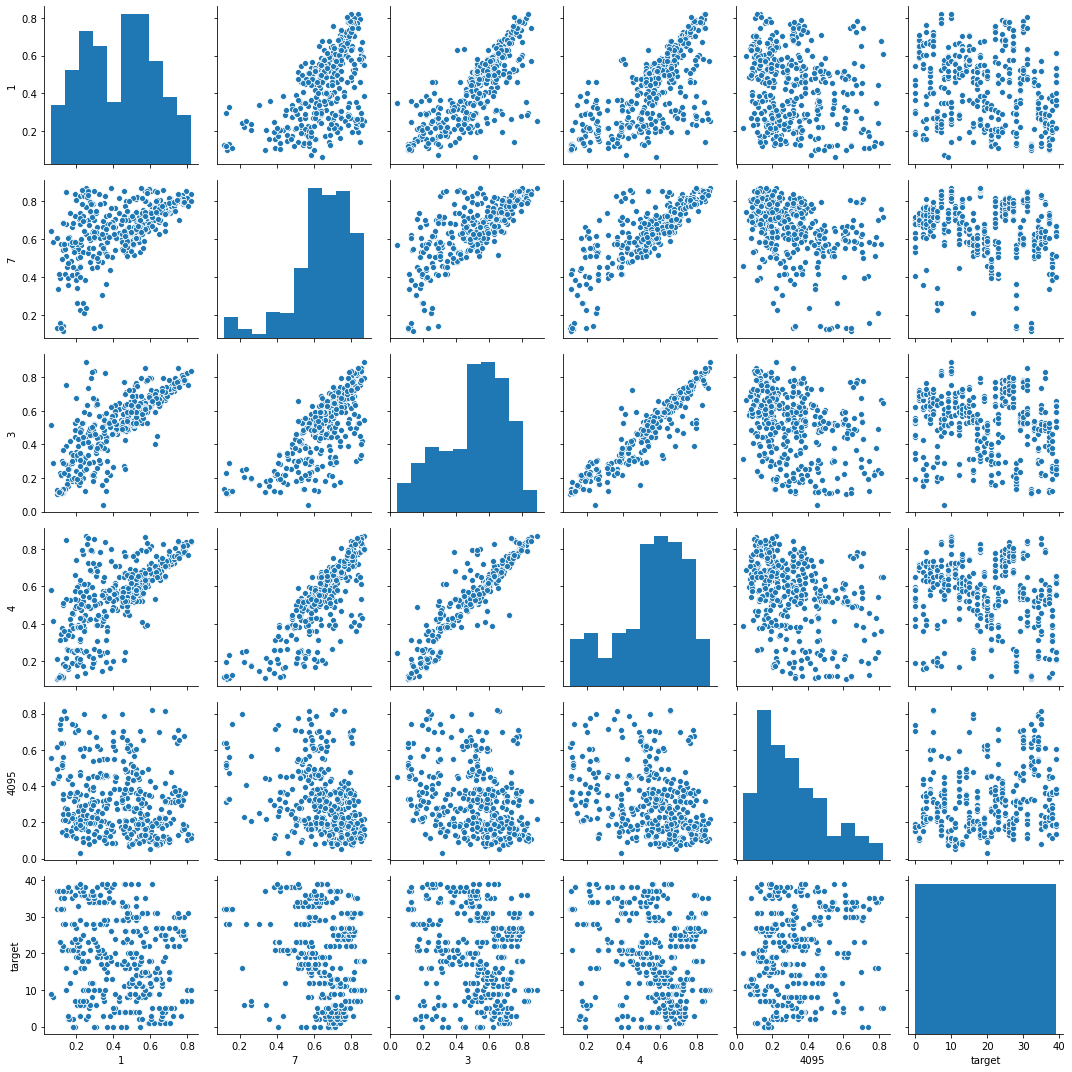

In [4]:
sns.pairplot(faces, vars =['1', '7', '3', '4', '4095', 'target'])
plt.tight_layout()
plt.show()

In [5]:
# faces.hist(bins=1)
# plt.show()

HELPER FUNCTIONS

In [6]:
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                             subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

X = faces.drop('target',axis = 1)
y = faces['target']

print (np.array(X).shape)

(400, 4096)


# COMPARE ALGORITHMS 

(Commented out, but you can uncomment it to view the results)

In [7]:
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# array = faces.values
# # X = array[:,0:8]
# # Y = array[:,8]
# # prepare configuration for cross validation test harness
# seed = 7
# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# # evaluate each model in turn
# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
# 	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# 	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
# 	results.append(cv_results)
# 	names.append(name)
# 	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# 	print(msg)
# # boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

In [8]:
faces.corr()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,1.000000,0.943217,0.814868,0.702582,0.609224,0.556316,0.525357,0.503028,0.473597,0.441116,...,-0.260497,-0.272071,-0.239309,-0.223129,-0.243603,-0.211231,-0.185307,-0.181182,-0.143213,-0.200631
1,0.943217,1.000000,0.924430,0.804965,0.697400,0.641778,0.604667,0.571075,0.535635,0.499481,...,-0.260885,-0.267603,-0.245155,-0.252350,-0.282713,-0.264153,-0.251341,-0.243453,-0.197476,-0.222113
2,0.814868,0.924430,1.000000,0.937977,0.826491,0.757834,0.710661,0.670561,0.627330,0.583468,...,-0.289152,-0.302656,-0.284168,-0.308511,-0.344060,-0.338443,-0.333210,-0.317073,-0.269769,-0.232312
3,0.702582,0.804965,0.937977,1.000000,0.937839,0.860794,0.805494,0.758328,0.710537,0.655427,...,-0.289744,-0.306978,-0.309002,-0.339849,-0.371025,-0.372524,-0.383855,-0.368682,-0.323276,-0.236577
4,0.609224,0.697400,0.826491,0.937839,1.000000,0.955308,0.891157,0.834226,0.780323,0.717512,...,-0.267672,-0.282133,-0.295587,-0.343057,-0.380145,-0.394614,-0.408263,-0.400189,-0.359229,-0.252033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-0.211231,-0.264153,-0.338443,-0.372524,-0.394614,-0.419366,-0.440186,-0.444082,-0.424772,-0.386623,...,0.565651,0.636543,0.652419,0.726174,0.879336,1.000000,0.909232,0.793411,0.731096,0.155511
4093,-0.185307,-0.251341,-0.333210,-0.383855,-0.408263,-0.427576,-0.450372,-0.451071,-0.430605,-0.393016,...,0.508166,0.581027,0.611565,0.678449,0.782197,0.909232,1.000000,0.911515,0.826297,0.153056
4094,-0.181182,-0.243453,-0.317073,-0.368682,-0.400189,-0.416441,-0.433513,-0.437633,-0.420030,-0.397388,...,0.427226,0.500189,0.548361,0.639942,0.711409,0.793411,0.911515,1.000000,0.943920,0.186893
4095,-0.143213,-0.197476,-0.269769,-0.323276,-0.359229,-0.374039,-0.382900,-0.379103,-0.362515,-0.346423,...,0.380800,0.458638,0.517277,0.603787,0.663843,0.731096,0.826297,0.943920,1.000000,0.225191


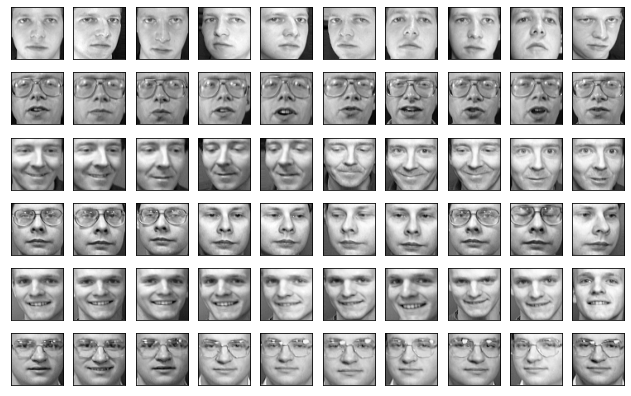

In [9]:
show_orignal_images(X)

In [10]:
# Pandas DataFrame describe() method is used to calculate some statistical data such as percentile, 
# mean and std of different numerical values of the DataFrame.
faces.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455,19.500000
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635,11.557853
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058,0.000000
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521,9.750000
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669422,0.683884,0.702479,...,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727,19.500000
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355,29.250000
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314,39.000000


In [11]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size=0.2, random_state=42) #CHANGED FROM 42 TO 1234

# PCA

In [12]:
pca=PCA(n_components=155)
pca_values=pca.fit_transform(X_train)
var = pca.explained_variance_ratio_
pca.components_[0]
# How compressed data is distributed.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([23.09, 36.8 , 45.17, 50.16, 53.98, 56.96, 59.33, 61.44, 63.37,
       65.16, 66.77, 68.22, 69.47, 70.67, 71.82, 72.85, 73.82, 74.65,
       75.43, 76.19, 76.87, 77.51, 78.12, 78.71, 79.28, 79.82, 80.36,
       80.87, 81.36, 81.8 , 82.22, 82.61, 82.99, 83.34, 83.68, 84.01,
       84.33, 84.64, 84.94, 85.23, 85.51, 85.78, 86.04, 86.29, 86.53,
       86.76, 86.99, 87.21, 87.43, 87.64, 87.85, 88.05, 88.24, 88.43,
       88.61, 88.79, 88.97, 89.14, 89.31, 89.48, 89.65, 89.81, 89.97,
       90.12, 90.27, 90.42, 90.57, 90.71, 90.85, 90.98, 91.11, 91.24,
       91.37, 91.49, 91.61, 91.73, 91.85, 91.97, 92.08, 92.19, 92.3 ,
       92.41, 92.52, 92.62, 92.72, 92.82, 92.92, 93.02, 93.12, 93.21,
       93.3 , 93.39, 93.48, 93.57, 93.66, 93.74, 93.82, 93.9 , 93.98,
       94.06, 94.14, 94.22, 94.3 , 94.37, 94.44, 94.51, 94.58, 94.65,
       94.72, 94.79, 94.86, 94.93, 95.  , 95.06, 95.12, 95.18, 95.24,
       95.3 , 95.36, 95.42, 95.48, 95.54, 95.6 , 95.66, 95.72, 95.77,
       95.82, 95.87,

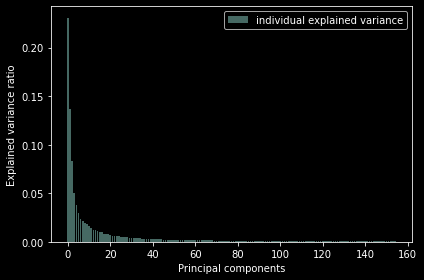

In [13]:
# # Plotting the variances for each PC
# PC = range(1, pca.n_components_+1)
# plt.bar(PC, pca.explained_variance_ratio_, color='blue')
# plt.xlabel('Principal Components')
# plt.ylabel('Variance %')
# plt.xticks(PC)

# # Putting components in a dataframe for later
# PCA_components = pd.DataFrame(pca_values)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(155), var, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
# plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='red')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.show()

Text(0, 0.5, 'Cumulative explained variance')

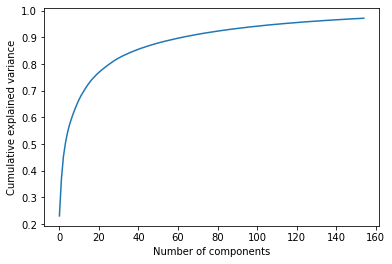

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis("tight")
# plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
# plt.savefig("pca_cumulative_variance.png")

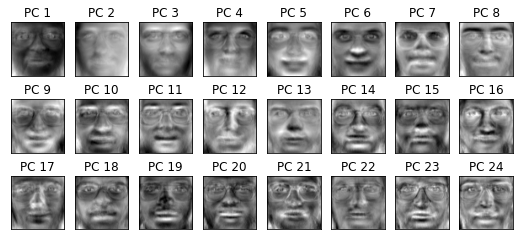

In [16]:
# display eigenfaces only works with X_train in pca instead of faces
show_eigenfaces(pca)

In [17]:
# projecting training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(X_train)

Projecting the input data on the eigenfaces orthonormal basis


In [18]:
# Classify initialization and fit training data

clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, Y_train)
clf

SVC(C=1000, gamma=0.001)

In [19]:
# Perform testing and get classification report (WITHOUT random_state=42 IT GETS 97% AND THIS WAS TO IMPROVE CNN ACCURACY)
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(X_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(Y_test, y_pred))

Predicting people's names on the test set
done in 0.094s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00 

# Testing Different Algorithms 

STEP 1: Implementing Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train, Y_train)
ypred = dt.predict(X_test)

Step 2: Making Confusion Matrix

In [21]:
confusion_matrix(Y_test, ypred)

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Step 3: Calculating Precision, Recall, F1-score, and Accuracy

In [22]:
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.40      0.50      0.44         4
           4       0.33      0.33      0.33         3
           5       0.50      0.33      0.40         3
           7       1.00      0.33      0.50         6
           8       0.33      1.00      0.50         2
           9       0.50      0.50      0.50         2
          10       0.50      0.50      0.50         2
          11       0.50      0.33      0.40         3
          12       0.50      0.50      0.50         2
          13       0.50      1.00      0.67         1
          14       1.00      0.33      0.50         3
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         3
          18       0.00    

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 4: Implementing K-Nearest Neighbors

In [23]:
##Sub-step A: Activate StandardScaler package from SKlearn and write syntax to scale data
from sklearn.neighbors import KNeighborsClassifier
##Sub-step B: Enable the classification function for KNN
knn = KNeighborsClassifier (n_neighbors=5)
##Sub-step C: Enter training data in the classification function for KNN
knn.fit(X_train,Y_train)
##Sub-step D: Determine predictions or forecasts
ypred = knn.predict(X_test)
ypred= pd.DataFrame(ypred)
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.75      0.75      0.75         4
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         1
          14       0.75      1.00      0.86         3
          15       1.00      0.50      0.67         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
          19       0.00    

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 5: Implementing Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier #jika menggunakan RF
rf = RandomForestClassifier(n_estimators = 300, criterion="entropy")
rf.fit(X_train, Y_train)
y_pred_RF = rf.predict(X_test)
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
          19       1.00    

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 6: Implementing Support Vector Machine Algorithm

In [25]:
##Sub-step A: Train the model using the training sets
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, Y_train.ravel())
##Sub-step B: Predict the response for test dataset
ypred = clf.predict(X_test)
ytest = Y_test.to_numpy()
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00    

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Step 7: Implementing Naive Bayes Algorithm

In [26]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred_NB = nb.predict(X_test)
print(classification_report(Y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         2
           9       0.29      1.00      0.44         2
          10       1.00      0.50      0.67         2
          11       1.00      0.67      0.80         3
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       0.50      1.00      0.67         2
          16       0.00      0.00      0.00         0
          17       1.00      0.33      0.50         3
          18       1.00    

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KMeans

In [27]:
z =pca_values[: 40]
new_df = pd.DataFrame(z, columns=["F"+str(i+1) for i in range(var1.shape[-1])])
new_df
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42)
kmeans.fit(new_df)
kmeans.labels_

array([4, 0, 2, 1, 1, 3, 1, 2, 0, 1, 4, 2, 1, 3, 1, 1, 1, 2, 4, 3, 4, 1,
       1, 3, 3, 4, 1, 1, 4, 4, 1, 2, 2, 2, 2, 3, 0, 1, 2, 2])

The lowest Sum of Squared Error/Euclidean (SSE) value

In [28]:
print("SSE value: ", kmeans.inertia_)
# Final location of the centroid
print("\n Final locations of the centroid: \n", kmeans.cluster_centers_[:1])
# Number of iterations required to converge
print("\n Iterations required to converge: ", kmeans.n_iter_)
# Storing cluster assignments in 1D Numpy array
print("\n Predicted labels: \n", kmeans.labels_)

SSE value:  1854.5023679517467

 Final locations of the centroid: 
 [[-1.12479375e+00 -6.40446540e+00 -1.13912230e+00  1.13510622e+00
   1.41903226e+00 -1.31130093e+00 -1.50074785e+00  1.27881849e-01
  -5.61820492e-01  1.59747874e+00  2.56153142e-01 -1.48797551e+00
  -7.17250701e-02  2.00234250e-01  3.87216240e-01 -9.44617223e-01
   5.56106065e-01 -2.90182715e-01  8.01006268e-02 -2.91345326e-02
   4.84860542e-01 -3.00915434e-01 -5.44544113e-01  4.44188197e-01
  -2.24325025e-01 -9.96620349e-02  5.07235038e-01 -3.52569445e-01
   2.16516530e-01 -4.26662872e-01 -4.53099527e-01  3.88985255e-01
   4.77730257e-01 -2.06687525e-01 -3.58458460e-01 -1.66330338e-01
  -2.09673409e-01  3.08785448e-01  7.01829927e-02  1.02222789e-01
  -1.16474472e-01 -3.17097447e-01  4.21852770e-01 -1.35152456e-01
   6.34450656e-02 -4.07354035e-02  2.63206877e-03 -1.78949871e-01
  -7.44903411e-01  1.16575412e-01  1.50075157e-01  1.88193496e-01
  -5.68837137e-02  1.20419256e-01  2.20124956e-01 -1.80500335e-01
   1.242

In [29]:
new_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F146,F147,F148,F149,F150,F151,F152,F153,F154,F155
0,-4.324558,11.178104,-0.616816,-0.665211,1.207034,-0.874970,-1.432617,-0.077637,0.374879,0.252272,...,-0.145473,-0.352591,-0.030648,0.070090,-0.141764,-0.115932,0.112981,0.167569,-0.103189,0.296086
1,0.656253,-4.955841,-3.462175,0.276298,1.024402,-1.045932,-2.808043,-0.182095,1.948368,1.288032,...,-0.067543,-0.017242,0.104703,0.159509,-0.304292,-0.073678,-0.236089,0.078667,0.018254,0.167331
2,4.862238,2.555298,-0.636025,-0.077089,0.402275,2.004086,1.107089,0.069091,0.626893,-0.539280,...,0.042616,-0.035368,-0.111363,0.105228,0.324051,0.158763,0.040462,0.107178,-0.237146,0.053279
3,2.437722,-1.036007,4.422206,-4.095742,-2.983666,-1.599988,0.149776,0.167257,-0.109090,1.183801,...,0.128478,0.017669,0.071483,0.256490,0.030994,0.070977,-0.010939,-0.225488,-0.175743,0.345675
4,-0.426793,-2.455548,-0.670387,-3.894714,-0.429788,0.929253,-0.304310,2.965126,-0.589485,0.722638,...,0.046714,0.116212,-0.061699,0.111486,-0.304672,0.162746,-0.147800,-0.113577,0.140316,0.068768


In [30]:
# new_df.hist()
# plt.show()

In [31]:
faces = new_df
faces.rename(columns={'F1':'label'}, inplace=True) # inplace=true is to delete it permanetly and has been depricated
faces.rename(columns={'F155':'target'}, inplace=True)

In [32]:
faces.head()

,label,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F146,F147,F148,F149,F150,F151,F152,F153,F154,target
0,-4.324558,11.178104,-0.616816,-0.665211,1.207034,-0.874970,-1.432617,-0.077637,0.374879,0.252272,...,-0.145473,-0.352591,-0.030648,0.070090,-0.141764,-0.115932,0.112981,0.167569,-0.103189,0.296086
1,0.656253,-4.955841,-3.462175,0.276298,1.024402,-1.045932,-2.808043,-0.182095,1.948368,1.288032,...,-0.067543,-0.017242,0.104703,0.159509,-0.304292,-0.073678,-0.236089,0.078667,0.018254,0.167331
2,4.862238,2.555298,-0.636025,-0.077089,0.402275,2.004086,1.107089,0.069091,0.626893,-0.539280,...,0.042616,-0.035368,-0.111363,0.105228,0.324051,0.158763,0.040462,0.107178,-0.237146,0.053279
3,2.437722,-1.036007,4.422206,-4.095742,-2.983666,-1.599988,0.149776,0.167257,-0.109090,1.183801,...,0.128478,0.017669,0.071483,0.256490,0.030994,0.070977,-0.010939,-0.225488,-0.175743,0.345675
4,-0.426793,-2.455548,-0.670387,-3.894714,-0.429788,0.929253,-0.304310,2.965126,-0.589485,0.722638,...,0.046714,0.116212,-0.061699,0.111486,-0.304672,0.162746,-0.147800,-0.113577,0.140316,0.068768


SEABORN 2

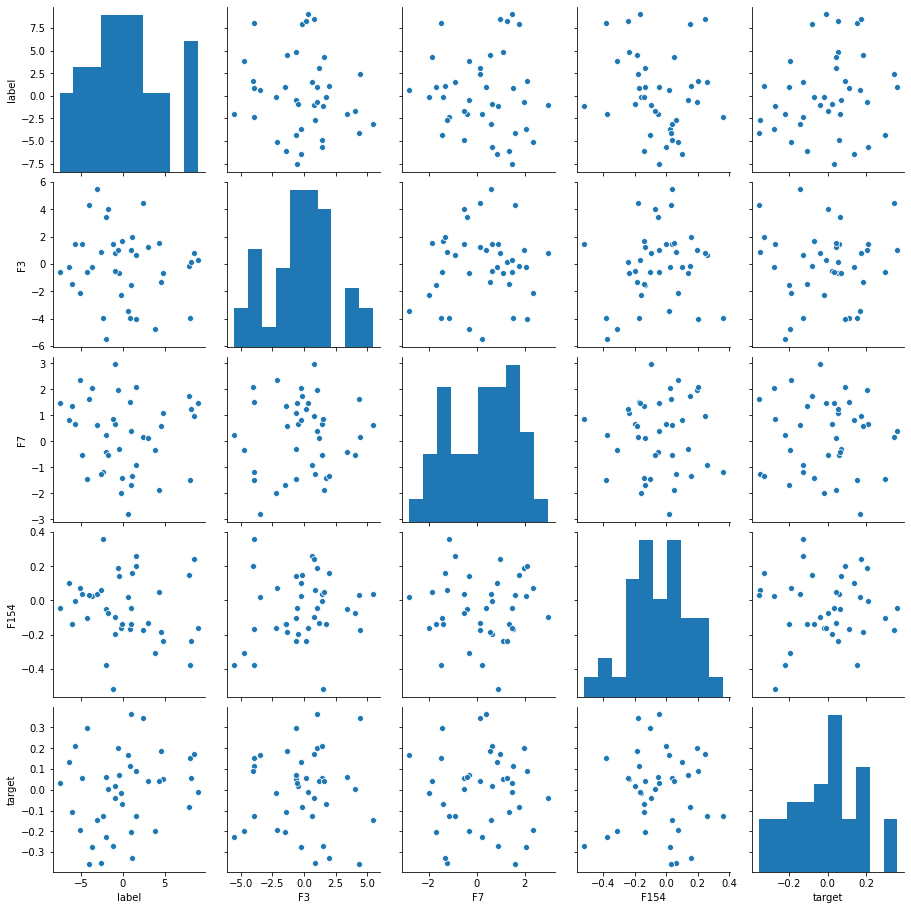

In [33]:
sns.pairplot(faces, vars =['label', 'F3', 'F7', 'F154', 'target'])

In [34]:
# only_one_by_prot = (faces.groupby("target").nunique()).any(axis=1)

In [35]:
# proteins_with_too_little_data = (
#     only_one_by_prot[only_one_by_prot]
#     .index.values
# )

In [36]:
# faces.query("target not in @proteins_with_too_little_data") 

In [37]:
# sns.pairplot(faces,hue='target', x_vars =['label', 'F3', 'F7', 'F154'], y_vars=['label'])

C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Zukisa NANTE\anaconda3\lib\site-packages\seabo

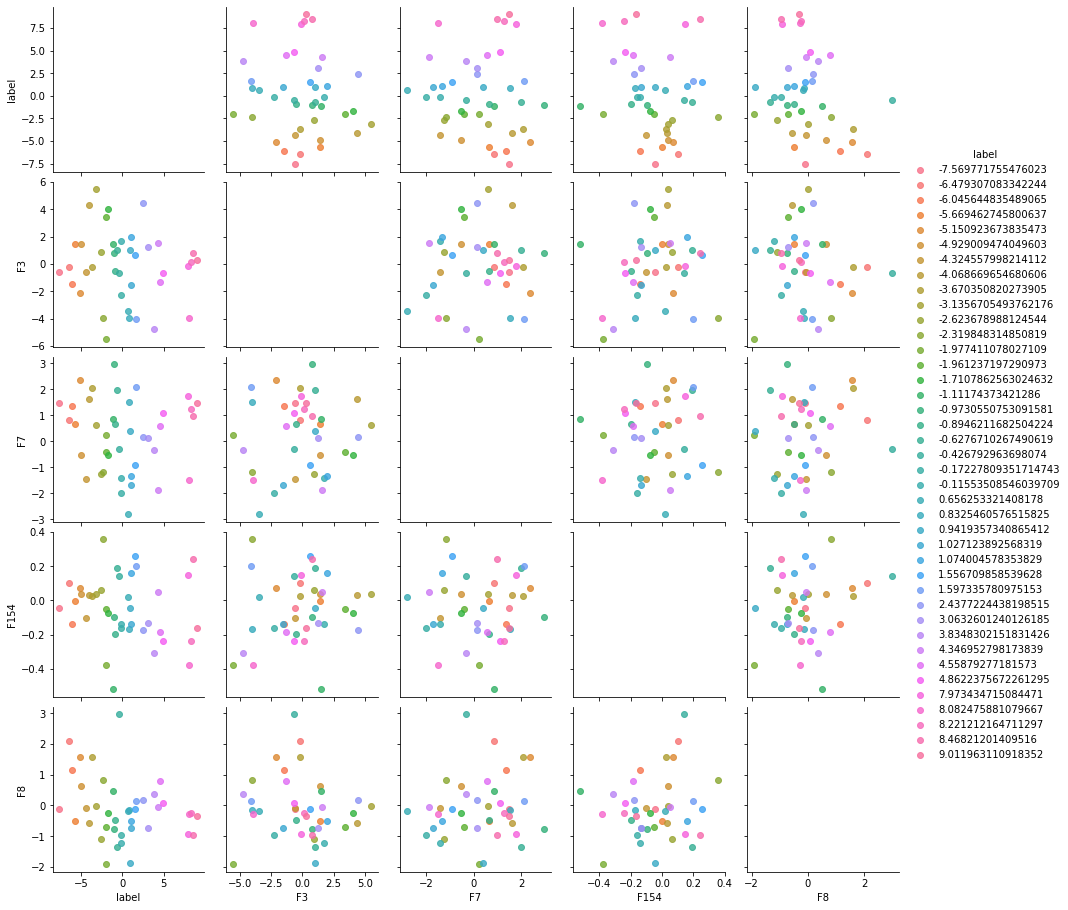

In [38]:
sns.pairplot(faces, vars =['label', 'F3', 'F7', 'F154', 'F8'], hue='label', kind='reg')

# Starting Normalisation to Prepare for CNN

In [39]:
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)
# X_train.copy()

MinMaxScaler()

In [40]:
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape

((320, 4096), (320,), (80, 4096))

In [41]:
X_train = X_train.reshape((X_train.shape[0], 64, 64, 1)).astype('float32') #22, 7, 1
X_test = X_test.reshape((X_test.shape[0], 64, 64, 1)).astype('float32')

In [42]:
print(X_train.shape)

(320, 64, 64, 1)


In [43]:
Y_train = to_categorical(Y_train, 40)
Y_test = to_categorical(Y_test, 40)
Y_train.shape, Y_test.shape

((320, 40), (80, 40))

In [44]:
num_classes = Y_test.shape[1]
num_classes

40

# CNN

In [45]:
from tensorflow.python.keras import regularizers
# Sotp training when no more improvement in the validation loss for 3 consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=90, min_delta=0, verbose=0, mode="auto", baseline=None,
    restore_best_weights=False,)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1), activation='relu', data_format="channels_last", kernel_initializer=tf.keras.initializers.HeNormal(), padding="same"))
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 1), activation='relu', data_format="channels_last", kernel_initializer=tf.keras.initializers.HeNormal(), padding="same"))
model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D((2,2),strides=(2,2), padding='same'))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

In [46]:
# rankdir='LR' is used to make the graph horizontal.
# tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [48]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# #datagen.fit(X_train)
# train_gen = datagen.flow(X_train, Y_train, batch_size=256)
# test_gen = datagen.flow(X_test, Y_test, batch_size=256)

In [49]:
# # Fit the model
# from keras.optimizers import Adam
# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
# # history = model.fit_generator(X_train, Y_train, validation_data=(X_test, Y_test), epochs=155, batch_size=256, callbacks=[callback], verbose=2)
# history = model.fit_generator(train_gen, 
#                               epochs = 90, 
#                               steps_per_epoch = X_train.shape[0] // 256,
#                               validation_data = test_gen,
#                               validation_steps = X_test.shape[0] // 256, callbacks=[callback], verbose=2)

TRAINING THE MODEL

In [50]:
from keras.optimizers import Adam
t0 = time()
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=90, batch_size=256, callbacks=[callback], verbose=2)

Epoch 1/90
2/2 - 2s - loss: 3.7466 - accuracy: 0.0250 - val_loss: 3.7332 - val_accuracy: 0.0375
Epoch 2/90
2/2 - 1s - loss: 3.6878 - accuracy: 0.0375 - val_loss: 3.7341 - val_accuracy: 0.0375
Epoch 3/90
2/2 - 1s - loss: 3.6230 - accuracy: 0.0500 - val_loss: 3.6813 - val_accuracy: 0.1000
Epoch 4/90
2/2 - 1s - loss: 3.5586 - accuracy: 0.1437 - val_loss: 3.6347 - val_accuracy: 0.0875
Epoch 5/90
2/2 - 1s - loss: 3.4987 - accuracy: 0.1906 - val_loss: 3.5765 - val_accuracy: 0.0875
Epoch 6/90
2/2 - 1s - loss: 3.4327 - accuracy: 0.2219 - val_loss: 3.4854 - val_accuracy: 0.2125
Epoch 7/90
2/2 - 2s - loss: 3.3615 - accuracy: 0.2531 - val_loss: 3.4079 - val_accuracy: 0.3250
Epoch 8/90
2/2 - 2s - loss: 3.2501 - accuracy: 0.3688 - val_loss: 3.3802 - val_accuracy: 0.2250
Epoch 9/90
2/2 - 2s - loss: 3.1527 - accuracy: 0.3531 - val_loss: 3.3097 - val_accuracy: 0.2375
Epoch 10/90
2/2 - 2s - loss: 3.0180 - accuracy: 0.4250 - val_loss: 3.2038 - val_accuracy: 0.2375
Epoch 11/90
2/2 - 2s - loss: 2.8726 - a

In [51]:
# Final evaluation of the model
scores = model.evaluate(X_test,Y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.25%


In [52]:
print("Loss of the model is - " , model.evaluate(X_test,Y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")

3/3 [==============================] - 0s 52ms/step - loss: 0.1270 - accuracy: 0.9875
Loss of the model is -  0.12704643607139587
3/3 [==============================] - 0s 51ms/step - loss: 0.1270 - accuracy: 0.9875
Accuracy of the model is -  98.7500011920929 %


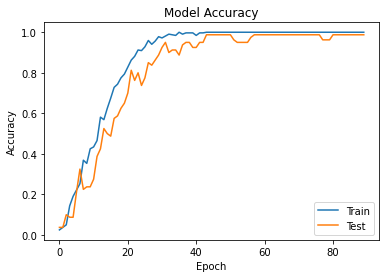

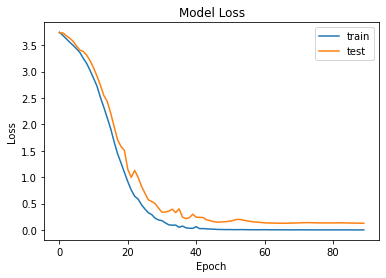

In [53]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('Model_loss.png')
plt.show()

In [54]:
model.save('weights.model')
model.save_weights("model.h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: weights.model\assets


In [55]:
Y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels[1]

28

In [57]:
rounded_predictions = model.predict_classes(X_test, batch_size=256, verbose=0)
rounded_predictions[1]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


28

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

In [59]:
# X_test[1]

In [60]:
X_test =np.argmax(X_test, axis=1)
# X_test[1]

In [61]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print(precision_score(rounded_labels, rounded_predictions , average="macro"))
print(recall_score(rounded_labels, rounded_predictions , average="macro"))
print(f1_score(rounded_labels, rounded_predictions , average="macro"))

0.9907407407407407
0.9953703703703705
0.991919191919192


MODEL CLASSIFICATION REPORT

In [62]:
print("done in %0.3fs" % (time() - t0))
print(classification_report(rounded_labels, rounded_predictions))

done in 463.934s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          

DISPLAY EPOCHS NOT MORE THAN 90

In [63]:
len(history.history['loss']) 

90

In [64]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue


In [65]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_1 (128, 40)


In [66]:
# summarize filters in each convolutional layer
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)


conv2d (3, 3, 1, 64)
conv2d_1 (3, 3, 64, 64)
conv2d_2 (3, 3, 64, 128)
conv2d_3 (3, 3, 128, 128)


In [67]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [68]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

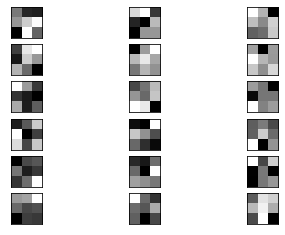

In [69]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()


In [70]:
# summarize feature map size for each conv layer
from matplotlib import pyplot
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d (None, 64, 64, 64)
1 conv2d_1 (None, 64, 64, 64)
3 conv2d_2 (None, 32, 32, 128)
4 conv2d_3 (None, 32, 32, 128)


In [71]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [72]:
# get feature map for first hidden layer
feature_maps = model.predict(X_train)

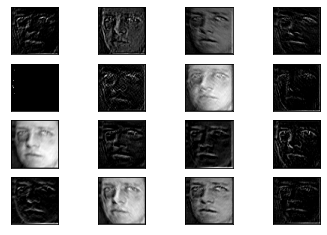

In [73]:
# plot 16 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [74]:
# redefine model to output right after the first hidden layer
ixs = [0]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Iput layer
model.layers[0].output

<tf.Tensor 'conv2d_input:0' shape=(None, 64, 64, 1) dtype=float32>

In [76]:
# Layer 1
model.layers[1].output

<tf.Tensor 'conv2d/Relu:0' shape=(None, 64, 64, 64) dtype=float32>

TO BE REDONE FOR LATER PURPOSE TO VIEW ALL LAYERS

In [77]:
# batch_test = X_test

# preds = model(batch_test[0])

# tf.print(preds.shape)
# preds = tf.argmax(preds, axis=1)
# print(preds)

# fig = plt.figure(figsize=(12, 4))
# for i in range(12):
#     ax = fig.add_subplot(2, 6, i+1)
#     ax.set_xticks([]); ax.set_yticks([])
#     img = batch_test[0][i, :, :, 0]
#     ax.imshow(img, cmap='gray_r')
#     ax.text(0.9, 0.1, '{}'.format(preds[i]), 
#             size=15, color='blue',
#             horizontalalignment='center',
#             verticalalignment='center', 
#             transform=ax.transAxes)
    
# #plt.savefig('figures/15_13.png', dpi=300)
# plt.show()

# THEN END!